
![alttext](logo.png)

# Unidad 4: Hipótesis y Correlación - Sesión 2

## Ejercicio 1: Evaluación de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

1. 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era administrar una encuesta para medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son estadísticamente diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con un valor de prueba $z=11.83$ y un puntaje de corte de 2.58, ¿qué se debe concluir?


### Respuesta
Dado que el puntaje z es mayor que el puntaje de corte 2.58, por lo que rechazamos la hipótesis que ambos porcentajes no son substancialmente diferentes.

2. Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?

### Respuesta
La muestra no es lo suficientemente grande para poder compararla con la distribución normal, por lo que sus resultados son cuestionables

## Ejercicio 2: Importe la base de datos utilizada la sesión anterior. 
* Agrege una serie de variables binarias por cada continente de la variable `region`.
    - _tip_: Utilice `np.where` para ello.

* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [3]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización

In [4]:
df =pd.read_csv('nations.csv', encoding='iso-8859-1')

In [6]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [7]:
df['region'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [51]:
regiones = df['region'].unique()
#df['Africa']=np.where(df['region']=='Africa',1,0)

In [12]:
for i in regiones:
    df[i]=np.where(df['region']==i,1,0)

In [20]:
df_subset_region = df.loc[: , ['region','chldmort','adfert','life','Africa', 'Americas', 'Asia', 'Europe', 'Oceania']]

## Ejercicio 3: Implemente una función de prueba de hipótesis a mano

* La función debe ingresar los siguientes argumentos:
    - `df`: La tabla de datos.
    - `variable`: La variable a analizar.
    - `binarize`: El indicador binario a utilizar.
* _tips:_ 
    - Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`.
    - Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`.
    - Reporte las medias para cada grupo (0 y 1).
    - Reporte la diferencia de entre las medias.
    - Reporte los valores t y p


In [166]:
def prueba_hipotesis(df, variable, binarize):
    df1 = df[variable][df[binarize]==1].dropna()
    df2 = df[variable][df[binarize]==0].dropna()
    print(variable, binarize)
    print('La media de',binarize,'es',df1.mean())
    print('La media del resto del mundo es',df2.mean())
    print('La diferencia de las medias es',(df1.mean() - df2.mean()))
    valorz, valorp = stats.ttest_ind(df1,df2)
    print('El valor z es', valorz)
    print('El valor p es', valorp)
    print('\n')

In [156]:
prueba_hipotesis(df_subset_region, 'adfert', 'Oceania')

adfert Oceania
La media del primer grupo es 44.99333400726322
La media del segundo grupo es 52.38603339847906
La diferencia de las medias es -7.392699391215835
El valor z es -0.6231321887004015
El valor p es 0.5339371393742243




## Ejercicio 4: Implemente una función que grafique los histogramas para ambas muestras.

* Genere una función que devuelva un gráfico donde visualice los dos histogramas de la variable acorde a cada subgrupo, respectivamente.
* _tips_: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.

In [161]:
def funcion_hist(df, variable, binarize, alpha, label):
    df1 = df[variable][df[binarize]==1].dropna()
    df2 = df[variable][df[binarize]==0].dropna()
    #plt.figure()
    plt.subplot(1, 2, 1)
    plt.hist(df1, alpha = alpha, label=label)
    plt.legend()
    plt.title(binarize+' =1, '+variable)
    plt.subplot(1, 2, 2)
    #plt.figure()
    plt.hist(df2, alpha= alpha, label=label, color='red')
    plt.title(binarize+' =0 '+variable)
    plt.legend()
    #prueba_hipotesis(df_subset_region, variable, i)

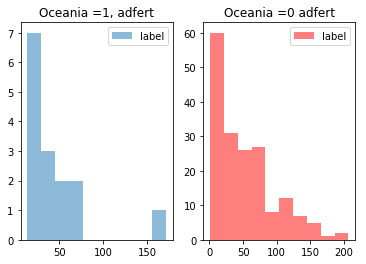

In [136]:
funcion_hist(df_subset_region,'adfert','Oceania',.5,'label')

## Ejercicio 5: Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

# Fertilidad adolescente

adfert Africa
La media de Africa es 92.72115342892133
La media del resto del mundo es 36.83450711361119
La diferencia de las medias es 55.88664631531014
El valor z es 9.444409431356496
El valor p es 1.2481674170069097e-17


adfert Americas
La media de Americas es 63.659999847412095
La media del resto del mundo es 49.20691819985708
La diferencia de las medias es 14.453081647555017
El valor z es 1.7662790555775358
El valor p es 0.07893816171889229


adfert Asia
La media de Asia es 33.86530622170896
La media del resto del mundo es 57.87999988671007
La diferencia de las medias es -24.014693665001104
El valor z es -3.386269877966909
El valor p es 0.0008592686089688165


adfert Europe
La media de Europe es 15.53720931396928
La media del resto del mundo es 62.14503303268887
La diferencia de las medias es -46.607823718719594
El valor z es -6.797972597840039
El valor p es 1.3040875269879142e-10


adfert Oceania
La media de Oceania es 44.99333400726322
La media del resto del mundo es 52.38603339

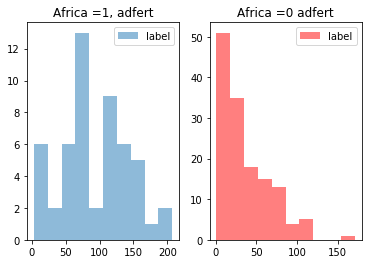

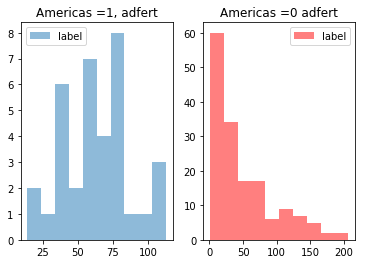

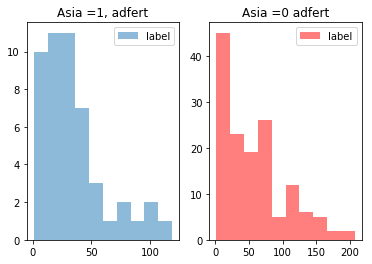

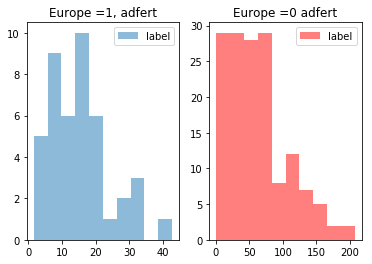

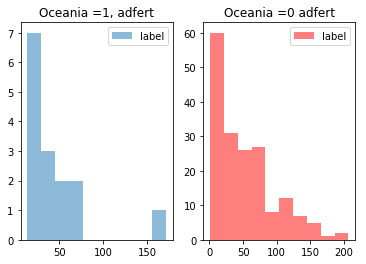

<Figure size 432x288 with 0 Axes>

In [167]:
for i in regiones:
    
    prueba_hipotesis(df_subset_region, 'adfert', i)
    funcion_hist(df_subset_region,'adfert',i,.5,'label')
    plt.figure()

Excepto por America, en todos los continentes rechazamos que el promedio de fertilidad adolescente sea similar a la del resto del mundo.

# Mortandad infantil

chldmort Africa
La media del primer grupo es 109.75
La media del segundo grupo es 24.74822695035461
La diferencia de las medias es 85.0017730496454
El valor z es 14.17367667788517
El valor p es 1.244572684496239e-31


chldmort Americas
La media del primer grupo es 23.264285714285716
La media del segundo grupo es 53.052215189873415
La diferencia de las medias es -29.7879294755877
El valor z es -3.08561941878294
El valor p es 0.00233300081092071


chldmort Asia
La media del primer grupo es 37.104166666666664
La media del segundo grupo es 51.141379310344824
La diferencia de las medias es -14.03721264367816
El valor z es -1.602738386676471
El valor p es 0.1106448646711535


chldmort Europe
La media del primer grupo es 7.046511627906977
La media del segundo grupo es 59.29
La diferencia de las medias es -52.243488372093026
El valor z es -6.262400472976766
El valor p es 2.4506589890929246e-09


chldmort Oceania
La media del primer grupo es 39.416666666666664
La media del segundo grupo es 48.3

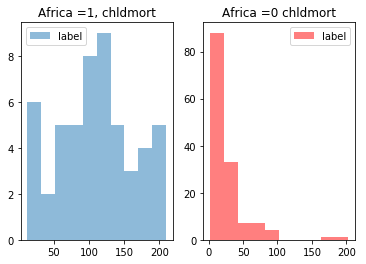

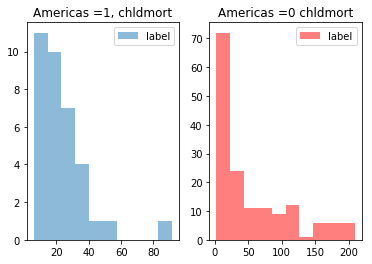

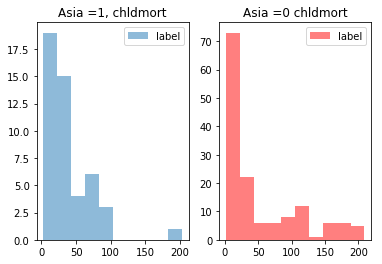

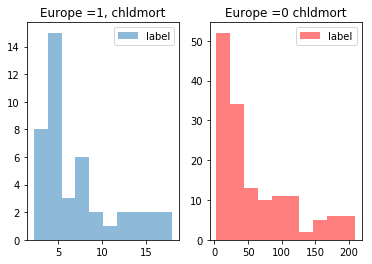

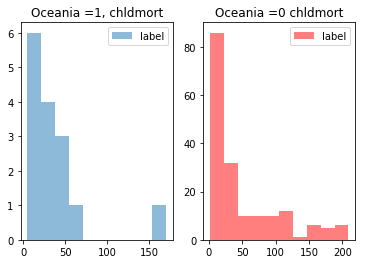

<Figure size 432x288 with 0 Axes>

In [163]:
for i in regiones:
    
    prueba_hipotesis(df_subset_region, 'chldmort', i)
    funcion_hist(df_subset_region,'chldmort',i,.5,'label')
    plt.figure()

Solo en  Asia y Oceania no podemos rechazar la hipótesis que tengan medias similares, en el resto rechazamos la hipótesis de que las medias sean similares.

# Expectativa de vida

life Africa
La media de Africa es 56.49038454202504
La media del resto del mundo es 73.21114999475614
La diferencia de las medias es -16.7207654527311
El valor z es -15.174602759471485
El valor p es 1.0713988391633837e-34


life Americas
La media de Americas es 73.45142800467355
La media del resto del mundo es 67.68983217155409
La diferencia de las medias es 5.761595833119458
El valor z es 3.138414667252044
El valor p es 0.0019666060685098454


life Asia
La media de Asia es 70.87244882388991
La media del resto del mundo es 68.0050572625522
La diferencia de las medias es 2.867391561337712
El valor z es 1.7346722179790488
El valor p es 0.08440370105334277


life Europe
La media de Europe es 76.94573619753815
La media del resto del mundo es 66.38951416520882
La diferencia de las medias es 10.55622203232933
El valor z es 6.735355531733241
El valor p es 1.8491610377704372e-10


life Oceania
La media de Oceania es 69.58444468180339
La media del resto del mundo es 68.65763477772973
La diferen

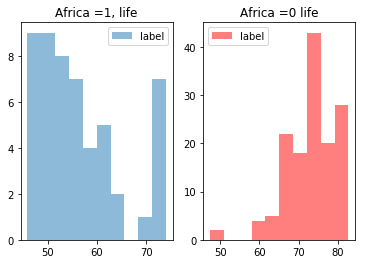

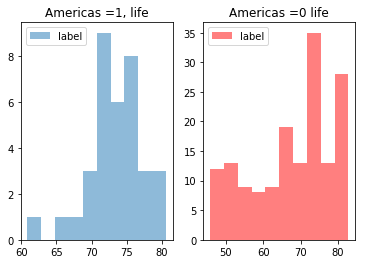

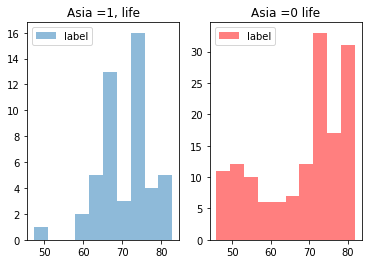

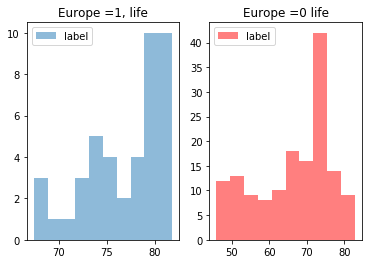

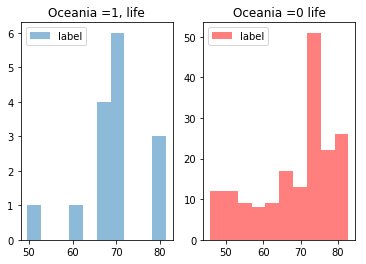

<Figure size 432x288 with 0 Axes>

In [168]:
for i in regiones:
    
    prueba_hipotesis(df_subset_region, 'life', i)
    funcion_hist(df_subset_region,'life',i,.5,'label')
    plt.figure()

No hay evidencia para rechazar la hipótesis que Oceanía y Asía tengan medias similares al resto del mundo. Rechazamos esa hipótesis en los demás continentes